# Carte XARRAY

In [4]:
import pandas as pd
import xarray as xr
import os
path = ''
os.chdir(path)

In [51]:
os.chdir(path)
data = pd.read_csv('data_summer_future_HR.csv')

month = 6
year = 2082

data = data.loc[(data.year == year) & (data.month == month)]
data = data[['rlon', 'rlat', 'TOT_PR', 'TOT_PR1', 'T_2M', 'T_2M1']]

xarr = xr.Dataset.from_dataframe(data.set_index(['rlat', 'rlon']))
xarr.T_2M.plot(cmap='viridis')

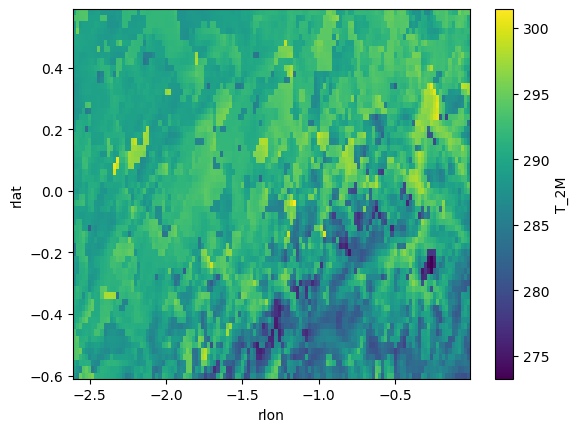

In [52]:
xarr.T_2M.plot(cmap='viridis')

# Carte Seaborn


In [32]:
import folium
import pandas as pd
import os
import tqdm
import math
from branca.colormap import LinearColormap

import numpy as np
import tqdm
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import functions_cartes
import seaborn as sns

In [37]:
os.chdir(path)
df = pd.merge(pd.read_csv('data2_summer_present_HR.csv')[['rlat', 'rlon', 'TOT_PR', 'year', 'month']],
                pd.read_csv('Topography/grille2.csv')[['rlat', 'rlon', 'lat', 'lon']],
                how = 'left', on = ['rlat', 'rlon'])

df = df.loc[(df.year == 2005) & (df.month == 6)]

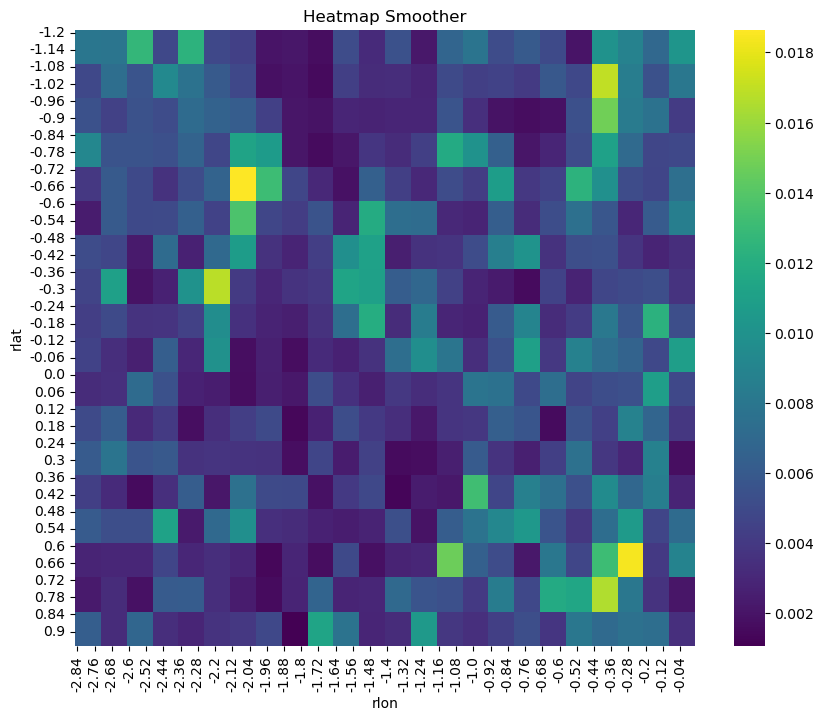

In [44]:
heatmap_data = df.pivot_table(index='rlat', columns='rlon', values='TOT_PR')

plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, cmap='viridis', fmt=".2f")

# Afficher la heatmap
plt.title('Heatmap Smoother')
plt.show()

# Carte FOLIUM

In [70]:
df = pd.merge(pd.read_csv('data_summer_future_LR12.csv')[['block', 'TOT_PR', 'year', 'month']],
                pd.read_csv('Topography/grille12.csv')[['rlat', 'rlon', 'block']],
                how = 'left', on = ['block'])
df = pd.merge(df, pd.read_csv('Topography/grille.csv')[['rlat', 'rlon', 'lat', 'lon']],
                how = 'left', on = ['rlat', 'rlon'])

df = df.loc[(df.year == 2080) & (df.month == 7)]

In [7]:
import folium
from folium import plugins

m = folium.Map(location=[df['lat'].mean(), df['lon'].mean()], zoom_start=6)

# Ajouter un heatmap avec interpolation
heat_data = [[row['lat'], row['lon'], row['TOT_PR']] for index, row in df.iterrows()]
plugins.HeatMap(heat_data, radius=15, blur=40).add_to(m)

display(m)


In [7]:
# Data
dico_block = functions_cartes.get_positions(path)

os.chdir(path)
df = pd.read_csv('data2_12.csv')[['Val', 'Test', 'rlat', 'rlon', 'block']]
df.drop_duplicates(inplace = True)

100%|██████████| 432/432 [00:05<00:00, 81.11it/s] 


In [13]:
location_carte = [46.65, 7.1]
zoom = 9
tiles = 'cartodbpositron'

Carte = folium.Map(location = location_carte,
                   zoom_start = zoom,
                   tiles = tiles)

for block in dico_block.keys():
        val = list(df.loc[df.block == block, 'Val'])[0]
        test = list(df.loc[df.block == block, 'Test'])[0]

        if test == 1 :

                folium.Polygon(
                        locations=dico_block[block],
                        color='darkblue',
                        weight=1,
                        fill_color='darkblue',
                        fill_opacity=0.2,
                        fill=True,
                        tooltip="Block " + str(block)).add_to(Carte)

        elif val == 1 :

                folium.Polygon(
                        locations=dico_block[block],
                        color='blue',
                        weight=1,
                        fill_color='blue',
                        fill_opacity=0.2,
                        fill=True,
                        tooltip="Block " + str(block)).add_to(Carte)

        else :

                folium.Polygon(
                        locations=dico_block[block],
                        color='gray',
                        weight=1,
                        fill_color='grey',
                        fill_opacity=0.2,
                        fill=True,
                        tooltip="Block " + str(block)).add_to(Carte)


display(Carte)

In [128]:
colormap = LinearColormap(['green', 'red'], vmin=min(data.T_Diff), vmax=max(data.T_Diff))
#colormap = LinearColormap(['green', 'red'], vmin=min(data.P_Diff), vmax=max(data.P_Diff))

location_carte = [46.65, 7.1]
zoom = 9
tiles = 'cartodbpositron'

Carte = folium.Map(location = location_carte,
                   zoom_start = zoom,
                   tiles = tiles)


for block in data.block.unique():
    if block not in  liste:
        valeur = list(data.loc[data.block == block, 'T_Diff'])[0]
        folium.Polygon(
            locations=dico_block[block],
            color=colormap(valeur),
            weight=1,
            fill_color=colormap(valeur),
            fill_opacity=0.4,
            fill=True,
            tooltip="Block " + str(block) + ' - ' + str(valeur),
        ).add_to(Carte)

Carte.add_child(colormap)
display(Carte)

In [4]:
Carte.save("ma_carte_temp.html")